# UTILITIES

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score


C:\Users\Dell\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Dell\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
C:\Users\Dell\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [ ]:
X_train = np.load("X_train_dft.npy", allow_pickle=True)
X_test = np.load("X_test_dft.npy", allow_pickle=True)
print(X_train.shape, X_test.shape)

(624, 1, 64) (624, 1, 64)


In [ ]:
Y_train = pd.read_csv("RavdessAudioOnlyNumpy__Y_train.csv", skipinitialspace=True)
Y_test = pd.read_csv("RavdessAudioOnlyNumpy__Y_test.csv", skipinitialspace=True)
Y_train.shape, Y_test.shape

((1828, 9), (624, 9))

In [ ]:
X_train_arr=np.array(X_train)
X_train_rid=np.squeeze(X_train_arr.T)
X_test_arr=np.array(X_test)
X_test_rid=np.squeeze(X_test_arr.T)

In [ ]:
X_test_rid.shape

(64, 624)

In [ ]:
##HIERARCHICAL CLUSTERING

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
Z = linkage(X_train_rid, method='ward', metric='euclidean')

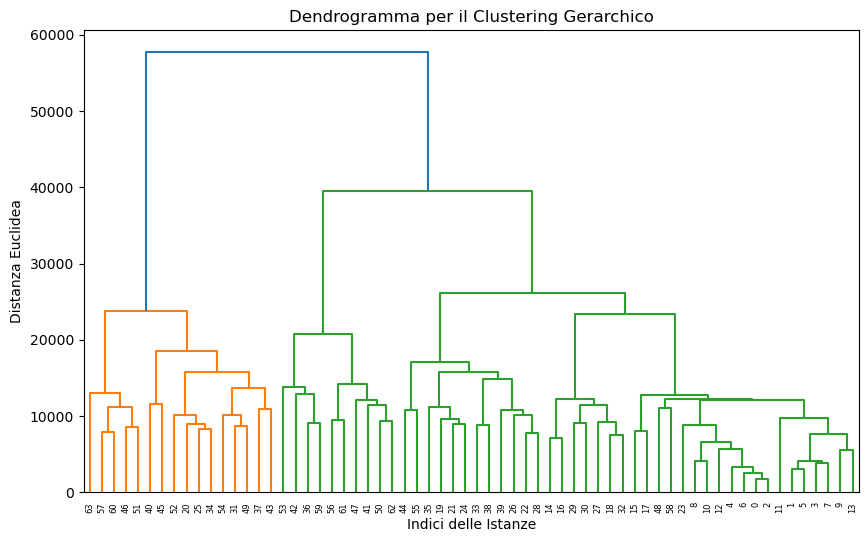

In [ ]:
matrice_linkage = linkage(X_train_rid, method='ward')

# Plotta il dendrogramma
plt.figure(figsize=(10, 6))
plt.title('Dendrogramma per il Clustering Gerarchico')
plt.xlabel('Indici delle Istanze')
plt.ylabel('Distanza Euclidea')
dendrogram(matrice_linkage)
plt.show()

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [35.0, 35.0, 45.0, 45.0],
  [20.0, 20.0, 40.0, 40.0],
  [5.0, 5.0, 30.0, 30.0],
  [55.0, 55.0, 65.0, 65.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [75.0, 75.0, 92.5, 92.5],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [145.0, 145.0, 155.0, 155.0],
  [122.5, 122.5, 150.0, 150.0],
  [83.75, 83.75, 136.25, 136.25],
  [60.0, 60.0, 110.0, 110.0],
  [17.5, 17.5, 85.0, 85.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [165.0, 165.0, 182.5, 182.5],
  [205.0, 205.0, 215.0, 215.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [225.0, 225.0, 242.5, 242.5],
  [210.0, 210.0, 233.75, 233.75],
  [173.75, 173.75, 221.875, 221.875],
  [265.0, 265.0, 275.0, 275.0],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [285.0, 285.0, 302.5, 302.5],
  [325.0, 325.0, 335.0, 335.0],
  [365.0, 365.0, 375.0, 375.0],
  [355.0, 355.0, 370.0, 370.0],
  [345.0, 345.0, 362.5, 

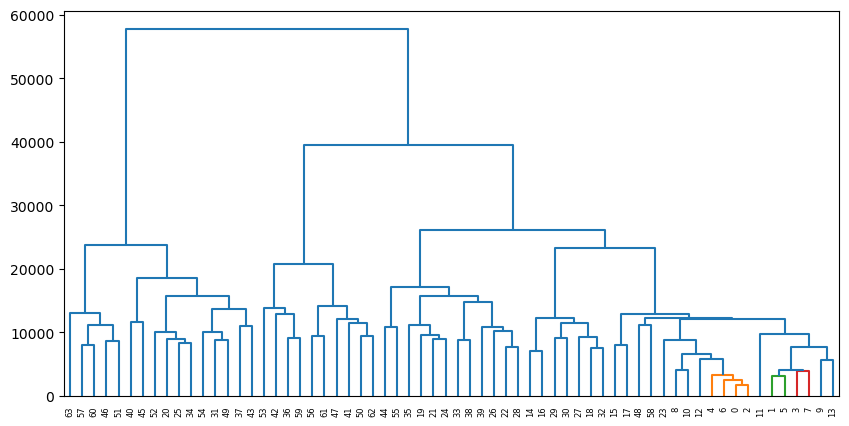

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z, color_threshold=4000)

C:\Users\Dell\AppData\Local\Temp\ipykernel_20704\1800104055.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


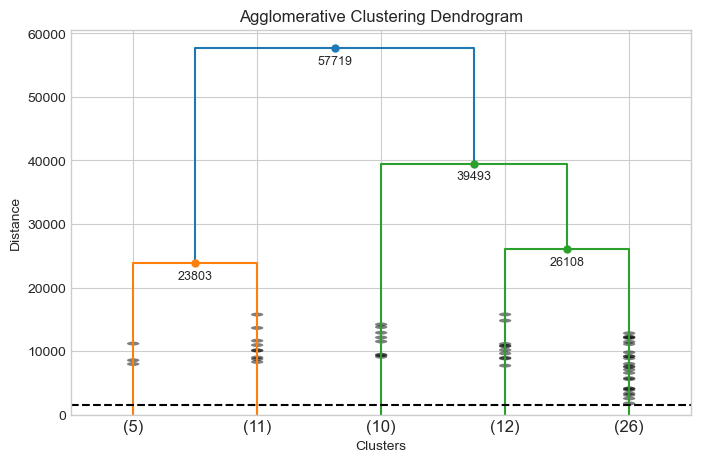

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(8, 5))
plt.title('Agglomerative Clustering Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Distance')

# cluster
Z = linkage(X_train_rid, method='ward', metric='euclidean')

labels = np.arange(len(X_train_rid))
# plot dendrogram
ddata = dendrogram(Z, orientation='top',
                    truncate_mode='lastp', p=5,
                    labels=labels, get_leaves=True,
                    show_leaf_counts=True,
                    show_contracted=True)

# plot cluster points & distance labels
limit = 4
for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
    x = sum(i[1:3])/2
    y = d[1]
    if y > limit:
        plt.plot(x, y, 'o', c=c, markeredgewidth=0)
        plt.annotate(int(y), (x, y), xytext=(0, -5),
                    textcoords='offset points',
                    va='top', ha='center', fontsize=9)

# plot distance
line = 1500
plt.axhline(y=line, c='black', linestyle='--');

## SINGLE

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=4, linkage='single')
clustering.fit(X_train_rid)

AgglomerativeClustering(linkage='single', n_clusters=4)

In [ ]:
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [ ]:
pd.value_counts(clustering.labels_)

0    61
2     1
3     1
1     1
dtype: int64

In [ ]:
def plot_dendrogram(clustering, **kwargs):
    """
    Funzione per la visualizzazione del dendrogramma del clustering gerarchico.
    Utilizza la libreria scipy per calcolare il dendrogramma.

    Parametri:
    - clustering: oggetto di clustering gerarchico già addestrato
    - **kwargs: argomenti opzionali da passare alla funzione dendrogram()
    """
    # Calcola la matrice di linkage utilizzando scipy
    linkage_matrix = linkage(clustering.children_)
    dendrogram(linkage_matrix, **kwargs)

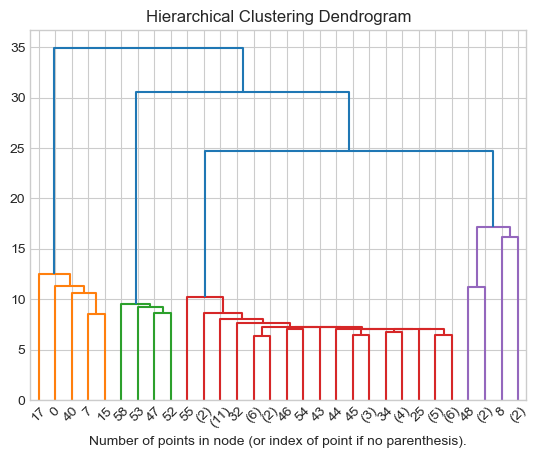

In [ ]:
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(clustering, truncate_mode="lastp")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
print(pd.value_counts(clustering.labels_))
print('silhouette', silhouette_score(X_train_rid, clustering.labels_))

0    61
2     1
3     1
1     1
dtype: int64
silhouette -0.018989222913889575


## COMPLETE

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering1 = AgglomerativeClustering(n_clusters=4, linkage='complete')
clustering1.fit(X_train_rid)

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [ ]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 0, 1, 2, 0, 1,
       2, 1, 3, 2, 0, 1, 2, 3, 1, 2, 1, 2, 2, 3, 1, 0, 3, 2, 2, 3],
      dtype=int64)

In [ ]:
pd.value_counts(clustering.labels_)

0    61
2     1
3     1
1     1
dtype: int64

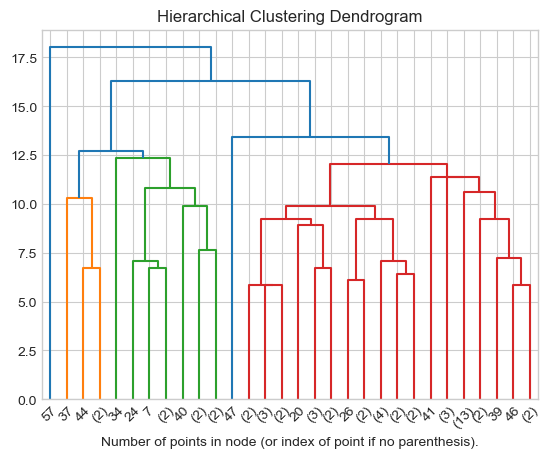

In [ ]:
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(clustering1, truncate_mode="lastp")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
print(pd.value_counts(clustering1.labels_))
print('silhouette', silhouette_score(X_train_rid, clustering1.labels_))

0    37
1    12
2    10
3     5
dtype: int64
silhouette 0.1487270212031688


## AVERAGE

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering2 = AgglomerativeClustering(n_clusters=4, linkage='average')
clustering2.fit(X_train_rid)

AgglomerativeClustering(linkage='average', n_clusters=4)

In [ ]:
clustering2.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 3, 2, 2, 2,
       0, 3, 1, 0, 2, 2, 0, 1, 2, 0, 2, 2, 0, 1, 2, 2, 1, 0, 0, 1],
      dtype=int64)

In [ ]:
pd.value_counts(clustering2.labels_)

2    49
0     7
1     6
3     2
dtype: int64

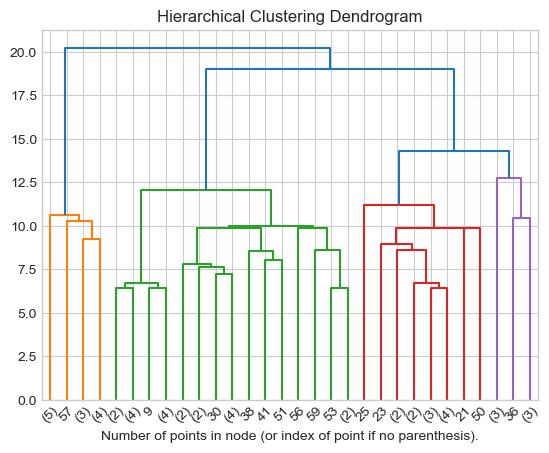

In [ ]:
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(clustering2, truncate_mode="lastp")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
print(pd.value_counts(clustering2.labels_))
print('silhouette', silhouette_score(X_train_rid, clustering.labels_))

2    49
0     7
1     6
3     2
dtype: int64
silhouette -0.018989222913889575


## WARD

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering3 = AgglomerativeClustering(n_clusters=4, linkage='ward')
clustering3.fit(X_train_rid)

AgglomerativeClustering(n_clusters=4)

In [ ]:
clustering3.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3,
       3, 1, 3, 0, 3, 1, 3, 1, 1, 0, 1, 3, 0, 3, 2, 0, 3, 3, 0, 2, 2, 0,
       3, 0, 0, 2, 1, 0, 2, 0, 0, 2, 0, 3, 2, 0, 1, 2, 0, 2, 2, 0],
      dtype=int64)

In [ ]:
pd.value_counts(clustering3.labels_)

1    26
0    16
3    12
2    10
dtype: int64

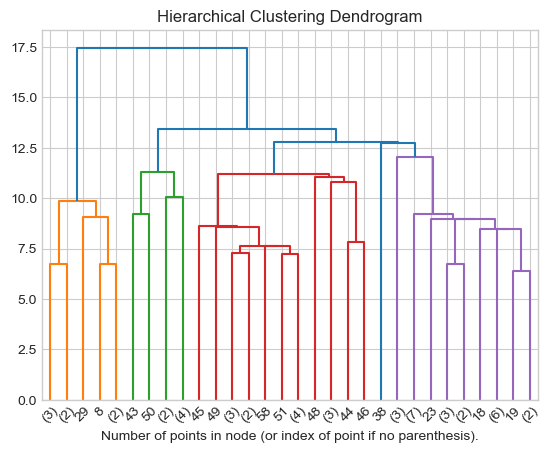

In [ ]:
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(clustering3, truncate_mode="lastp")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
print(pd.value_counts(clustering3.labels_))
print('silhouette', silhouette_score(X_train_rid, clustering.labels_))

1    26
0    16
3    12
2    10
dtype: int64
silhouette -0.018989222913889575
